In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp39-cp39-macosx_10_9_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp39-cp39-macosx_10_9_universal2.whl (2.7 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the dataset
file_path = "/Users/leonardojdss/Desktop/projetos/GenAI-Machine-Learning-MCP/pipeline-deep-learning/massa/credit_risk_dataset_original.csv"
dataset_credit_risk = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print(type(dataset_credit_risk))
dataset_credit_risk.head(5)

<class 'pandas.core.frame.DataFrame'>


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,35000,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,1000,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,0.57,N
3,23,65500,RENT,4.0,MEDICAL,35000,0.53,N
4,24,54400,RENT,8.0,MEDICAL,35000,0.55,Y


In [10]:
"""Dicionario dos dados"""

# person_age - Idade (X = Caracteristicas)
# person_income - Renda Anual (X = Caracteristicas)
# person_home_ownership - Casa própria (X = Caracteristicas)
# person_emp_length - Duração do emprego (em anos) (X = Caracteristicas)
# loan_intent - Intenção de empréstimo (X = Caracteristicas)
# loan_amnt - Valor do empréstimo (X = Caracteristicas)
# loan_percent_income - Percentual de renda (X = Caracteristicas)
# cb_person_default_on_file - Inadimplência histórica (X = Caracteristicas)

'Dicionario dos dados'

# 1 - ANÁLISE EXPLORATÓRIA

In [13]:
# Checking if exist columns with null values
count_isnull = dataset_credit_risk.isnull().sum()
count_isnull

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length            895
loan_intent                    0
loan_amnt                      0
loan_percent_income            0
cb_person_default_on_file      0
dtype: int64

In [14]:
# Checking if exist columns with values duplicated
count_duplicated = dataset_credit_risk.duplicated().sum()

if count_duplicated == 0:
    print("Not exist duplicated records")
else:
    print("Exist duplicated records")

Exist duplicated records


In [15]:
# checking all types of columns
dataset_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   person_income              32581 non-null  int64  
 2   person_home_ownership      32581 non-null  object 
 3   person_emp_length          31686 non-null  float64
 4   loan_intent                32581 non-null  object 
 5   loan_amnt                  32581 non-null  int64  
 6   loan_percent_income        32581 non-null  float64
 7   cb_person_default_on_file  32581 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [20]:
# Analysis of descritive statistics
descritive_statistics = dataset_credit_risk["loan_amnt"]
descritive_statistics = pd.DataFrame(descritive_statistics, columns=["loan_amnt"])
descritive_statistics = descritive_statistics.describe().round(2)
descritive_statistics = descritive_statistics.rename(columns={'loan_amnt':'estatísticas descritivas'})
descritive_statistics

,estatísticas descritivas
count,32581.00
mean,9589.37
std,6322.09
min,500.00
25%,5000.00
50%,8000.00
75%,12200.00
max,35000.00


{'whiskers': [<matplotlib.lines.Line2D at 0x11928aee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1192f0460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1192237c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1192f09a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1192f0c40>],
 'means': []}

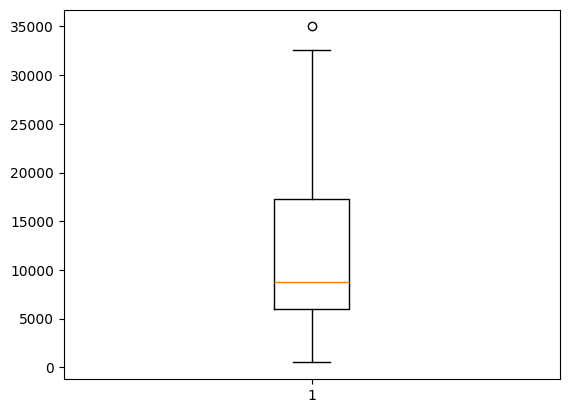

In [21]:
#Plot descriptive statistics
fig = plt.boxplot(descritive_statistics)
fig

* Com o gráfico é possível analisar que não possuímos quase nenhum outlier, facilitando o trabalhar de identificar a massa que será concentrado a política de crédito, ou seja o banco assumiu como estratégia realizar empréstimo para um grupo onde se concentra a maioria dos pedidos, não tem muita aleatoridade. De acordo com o boxplot entre o primeiro quartil e o terceiro quartia as solicitações de crédito estão concentradas a maiorias das massas.